<a href="https://colab.research.google.com/github/qalshakhoori/ne_task/blob/main/MOFNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
xls = pd.ExcelFile('/content/gdrive/My Drive/Q2 2022 Final draft - MOFNE.xlsx')
table6 = pd.read_excel(xls, 4, usecols='B:S')

In [ ]:
def parseValues(name):
  return pd.concat([table6[name][9:10], table6[name][31:32], table6[name][35:36], table6[name][39:40], table6[name][40:41], table6[name][41:42], table6[name][42:43]]).values

In [ ]:
sectors = parseValues('Unnamed: 1')
gpd2019q1 = parseValues('Unnamed: 3')
gpd2019q2 = parseValues('Unnamed: 4')
gpd2019q3 = parseValues('Unnamed: 5')
gpd2019q4 = parseValues('Unnamed: 6')
gpd2020q1 = parseValues('Unnamed: 8')
gpd2020q2 = parseValues('Unnamed: 9')
gpd2020q3 = parseValues('Unnamed: 10')
gpd2020q4 = parseValues('Unnamed: 11')
gpd2021q1 = parseValues('Unnamed: 13')
gpd2021q2 = parseValues('Unnamed: 14')
gpd2021q3 = parseValues('Unnamed: 15')
gpd2021q4 = parseValues('Unnamed: 16')
gpd2022q1 = parseValues('Unnamed: 17')
gpd2022q2 = parseValues('Unnamed: 18')
sectors

array(['1) The non-Financial Corporations ',
       '2) The Financial Corporations ', '3) Government Services ',
       '4) Private Non-Profit Institutions Serving Households',
       '5) Households with Employed Persons ',
       '6) GDP at Producer Prices', '7) Tax on Products'], dtype=object)

In [ ]:
def createDataFrame(year, quarter, values):
  indexRange = range(len(sectors))
  return pd.DataFrame({
      'sector': sectors,
      'year': pd.Series(year, index=indexRange),
      'quarter': pd.Series(quarter, index=indexRange),
      'value':  values
  })

data = pd.concat([
    createDataFrame('2019', '1', gpd2019q1),
    createDataFrame('2019', '2', gpd2019q2),
    createDataFrame('2019', '3', gpd2019q3),
    createDataFrame('2019', '4', gpd2019q4),
    createDataFrame('2020', '1', gpd2020q1),
    createDataFrame('2020', '2', gpd2020q2),
    createDataFrame('2020', '3', gpd2020q3),
    createDataFrame('2020', '4', gpd2020q4),
    createDataFrame('2021', '1', gpd2021q1),
    createDataFrame('2021', '2', gpd2021q2),
    createDataFrame('2021', '3', gpd2021q3),
    createDataFrame('2021', '4', gpd2021q4),
    createDataFrame('2022', '1', gpd2022q1),
    createDataFrame('2022', '2', gpd2022q2),
    ])

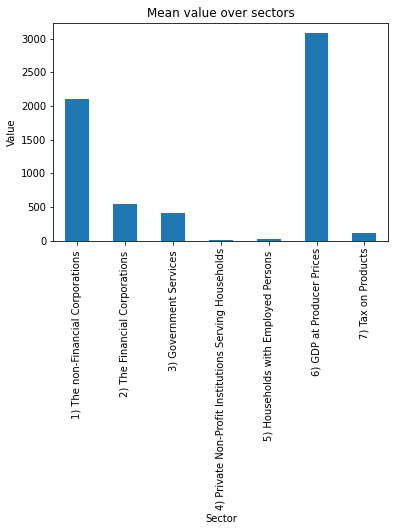

In [ ]:
avg_sector = data.groupby(['sector'])['value'].mean()
avg_sector.plot(kind = 'bar')
plt.title('Mean value over sectors')
plt.xlabel('Sector')
plt.ylabel('Value')
plt.show()

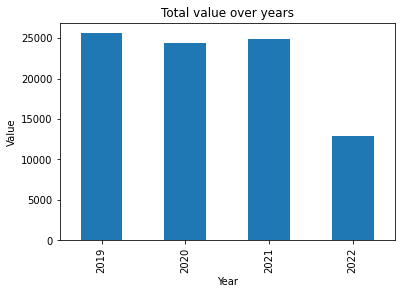

In [ ]:
total_year = data.groupby(['year'])['value'].sum()
total_year.plot(kind = 'bar')
plt.title('Total value over years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()